# Regresión Lineal Simple (una única variable de entrada o variable independiente)

## Ejercicio 3

A continuación, se presentan datos de entrenamiento y tiempo promedio de un recorrido de corredores para una distancia fija. Los datos están organizados en una tabla con las horas de entrenamiento semanales y el tiempo promedio en minutos para completar el recorrido:

<div align="center">
	<table style="border-collapse: collapse; text-align: center;">
	<tr style="background-color:#4DA6D8; color:white;">
		<th style="padding:8px; border:1px solid #ddd;">Horas de Entrenamiento</th>
		<th style="padding:8px; border:1px solid #ddd;">Tiempo Promedio (min)</th>
	</tr>
	<tr><td>2</td><td>30.5</td></tr>
	<tr><td>3</td><td>29.3</td></tr>
	<tr><td>4</td><td>26.7</td></tr>
	<tr><td>4</td><td>26.0</td></tr>
	<tr><td>5</td><td>25.5</td></tr>
	<tr><td>6</td><td>24.7</td></tr>
	<tr><td>6</td><td>23.5</td></tr>
	<tr><td>7</td><td>23.0</td></tr>
	<tr><td>7</td><td>22.5</td></tr>
	<tr><td>8</td><td>21.0</td></tr>
	<tr><td>10</td><td>21.0</td></tr>
	<tr><td>10</td><td>20.5</td></tr>
	</table>
</div>

A partir de los datos de entrenamiento y tiempos de recorrido de los corredores, se desea obtener la recta de regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia fija a partir de las horas de entrenamiento semanales. Responder:


### a)  

Calcule la correlación lineal entre estas dos variables y dibuje el diagrama de dispersión correspondiente. ¿La recta de regresión será de utilidad?


Correlación lineal: -0.959746386006859


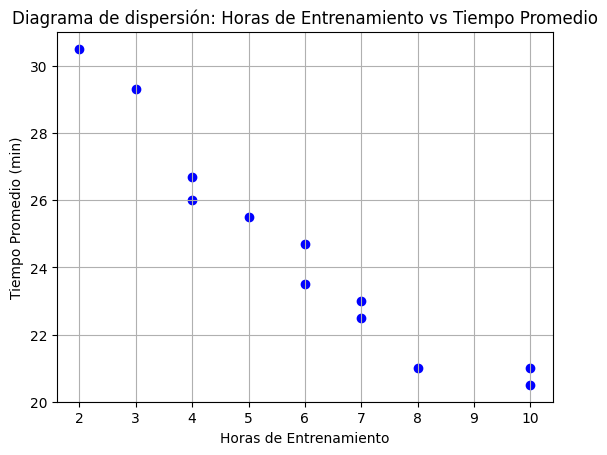

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    "horas_entrenamiento": [2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10],
    "tiempo_promedio": [30.5, 29.3, 26.7, 26.0, 25.5, 24.7, 23.5, 23.0, 22.5, 21.0, 21.0, 20.5]
})

corr_lineal = data["horas_entrenamiento"].corr(data["tiempo_promedio"])
print("Correlación lineal:", corr_lineal)

plt.scatter(data["horas_entrenamiento"], data["tiempo_promedio"], color='blue')
plt.xlabel("Horas de Entrenamiento")
plt.ylabel("Tiempo Promedio (min)")
plt.title("Diagrama de dispersión: Horas de Entrenamiento vs Tiempo Promedio")
plt.grid(True)


#La recta de regresion sera de utilidad ya que hay alta correlacion lineal


### b)  

Indique la ecuación del error cuadrático medio que se debería minimizar si se utilizara la técnica de descenso de gradiente.

El error cuadrático, valor a minimizar, que se utiliza en esta técnica es:

$$
\xi = \left\langle \epsilon_{k}^{2} \right\rangle = \frac{1}{L} \left[ \sum_{i=1}^L (y_i - (m x_i + b))^2 \right]
$$

Para $L$ puntos, siendo $y_{i}$ el valor de la función a tratar en el punto *i-esimo*.

### c)  

Indique la ecuación de error que se minimiza al utilizar la técnica de descenso de gradiente estocástico.  
¿Qué ventaja tiene su uso con respecto a la ecuación indicada en b)?

El valor a minimizar en esta técnica es:

$$
\xi = \left\langle \epsilon_{k}^{2} \right\rangle \approx (y_i - (m x_i + b))^2
$$

Esta ecuación si bien es una aproximación y no tiene la misma exactitud que la anterior, tiene la ventaja de no requerir todos los puntos para el cálculo, sino que permite realizar el cálculo por separado y permite no recalcular todo cuando se añade un nuevo punto.


### d)  

Utilice la técnica de descenso de gradiente estocástico para obtener los coeficientes de la recta de regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia fija a partir de las horas de entrenamiento semanales.



Coeficientes obtenidos con descenso de gradiente estocástico:
w (pendiente) = -1.0738
b (intercepto) = 31.2325


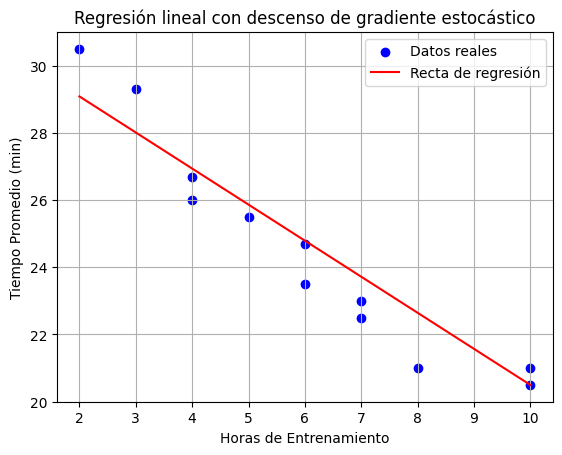

In [13]:
from sympy import symbols, diff
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import lambdify
FUENTES_DIR = '../Fuentes'
import sys
sys.path.append(FUENTES_DIR)
from ClassNeuronaLineal import NeuronaLineal

X = data[['horas_entrenamiento']].values   # (n,1)
y = data['tiempo_promedio'].values         # (n,)

# --- Entrenar neurona lineal ---
modelo = NeuronaLineal(alpha=0.01, n_iter=500, cotaE=1e-4, draw=0,
                       title=['Horas de Entrenamiento', 'Tiempo Promedio'])

modelo.fit(X, y)

print("\nCoeficientes obtenidos con descenso de gradiente estocástico:")
print(f"w (pendiente) = {modelo.w_[0]:.4f}")
print(f"b (intercepto) = {modelo.b_:.4f}")

# --- Graficar puntos y recta de regresión ---
plt.scatter(X, y, color='blue', label='Datos reales')

x_range = np.linspace(min(X), max(X), 100)
y_pred = modelo.predict(x_range)

plt.plot(x_range, y_pred, color='red', label='Recta de regresión')
plt.xlabel("Horas de Entrenamiento")
plt.ylabel("Tiempo Promedio (min)")
plt.title("Regresión lineal con descenso de gradiente estocástico")
plt.legend()
plt.grid(True)
plt.show()

### e)  

Utilice la recta obtenida en d) para predecir el tiempo promedio que tardará en recorrer la distancia fija un corredor que entrena 9 horas semanales.



In [18]:
print("Un corredor que entrena 9 horas semanales tardaría en promedio:", modelo.w_[0]*9 + modelo.b_, "minutos")

Un corredor que entrena 9 horas semanales tardaría en promedio: 21.568546233752066 minutos
